Ref: http://www-bcf.usc.edu/~gareth/ISL/data.html

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

SEED = 13

In [2]:
data = pd.read_csv('Advertising.csv', index_col=0)

In [3]:
print('Data shape : rows: %s, cols : %s'% data.shape)

Data shape : rows: 200, cols : 4


In [4]:
np.random.seed(SEED)
sample_sales_values = data.sample(10)['sales'].values
sample_sales_values

array([12.6,  3.2, 15.5, 12.9, 11.7, 25.5, 20.7, 13.4, 24.7, 15.5])

In [5]:
avg_sale_of_sample = np.mean(sample_sales_values)
print('Avg sale : %.2f' % avg_sale_of_sample)

Avg sale : 15.57


In [6]:
tv_sales_data = data[['TV','sales']].copy()
print('Data shape : rows: %s, cols : %s'% tv_sales_data.shape)

Data shape : rows: 200, cols : 2


In [7]:
X = data['TV']
y = data['sales']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=SEED)

In [8]:
print('Train Features shape :  %s'% str(X_train.shape))
print('Train Labels shape :  %s'% str(y_train.shape))
print('Test Features shape :  %s'% str(X_test.shape))
print('Test Labels shape :  %s'% str(y_test.shape))

Train Features shape :  (134,)
Train Labels shape :  (134,)
Test Features shape :  (66,)
Test Labels shape :  (66,)


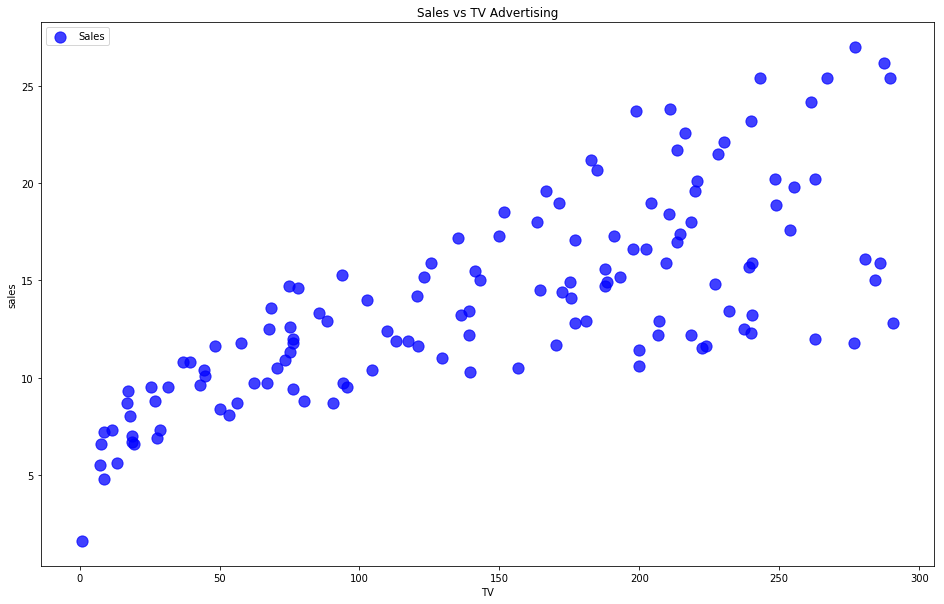

In [9]:
plt.figure(figsize=(16,10))

x = X_train.values
y = y_train.values

plt.scatter(x, y, s= 500,c="b", alpha=0.75, marker='.',label='Sales')
plt.xlabel("TV")
plt.ylabel("sales")
plt.title('Sales vs TV Advertising')
plt.legend(loc='upper left')
plt.show()

In [10]:
y = y_train.values
mean_y = np.mean(y)
print('Avg sale : %.2f' % mean_y)

Avg sale : 13.96


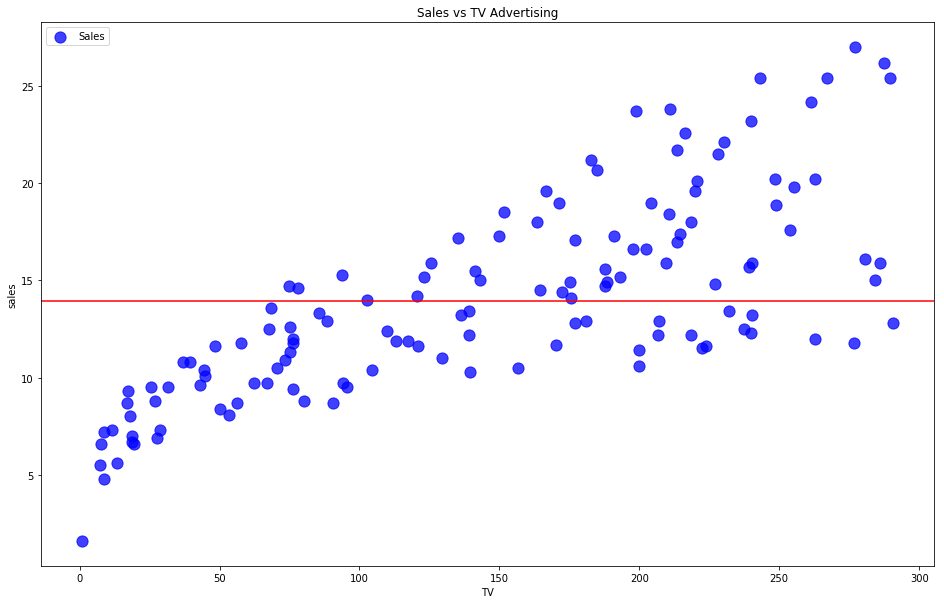

In [11]:
plt.figure(figsize=(16,10))

x = X_train.values
y = y_train.values

plt.scatter(x, y, s= 500,c="b", alpha=0.75, marker='.',label='Sales')
plt.axhline(y=mean_y, color='r', linestyle='-')

plt.xlabel("TV")
plt.ylabel("sales")
plt.title('Sales vs TV Advertising')
plt.legend(loc='upper left')
plt.show()

In [12]:
true_lables = y_test
prediction = np.full((len(y_test)), mean_y)

In [13]:
print(metrics.mean_squared_error(true_lables, prediction))

31.275837738039787


Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [14]:
X = X_train.values.reshape(-1,1)
y = y_train.values

In [15]:
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     0.04474073596156979
Model intercept: 7.439627230147129


In [17]:
xfit = np.linspace(0, 300, 1000)
yfit = model.predict(xfit.reshape(-1,1))

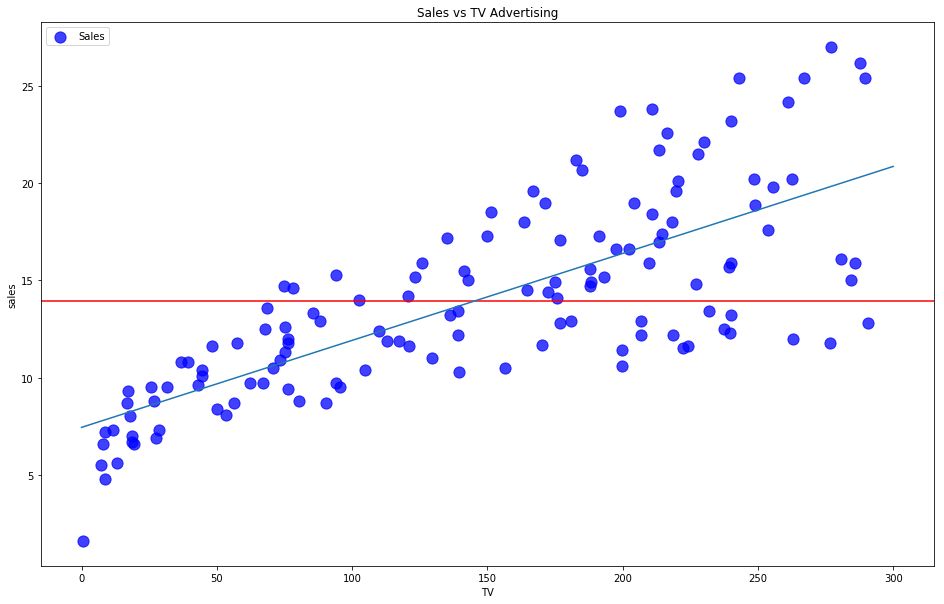

In [18]:
plt.figure(figsize=(16,10))

x = X_train.values
y = y_train.values

plt.scatter(x, y, s= 500, c="b", alpha=0.75, marker='.',label='Sales')
plt.axhline(y=mean_y, color='r', linestyle='-')
plt.plot(xfit, yfit)

plt.xlabel("TV")
plt.ylabel("sales")
plt.title('Sales vs TV Advertising')
plt.legend(loc='upper left')
plt.show()

In [19]:
true_lables = y_test
prediction_linear_model = model.predict(X_test.values.reshape(-1,1))

In [20]:
print(metrics.mean_squared_error(true_lables, prediction_linear_model))

10.12746338419312


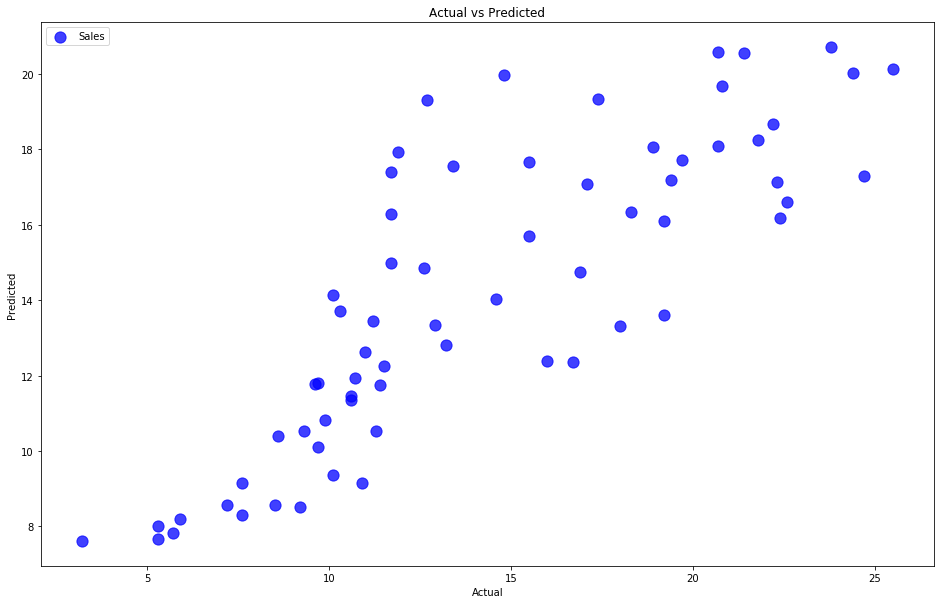

In [21]:
plt.figure(figsize=(16,10))

x = true_lables
y = prediction_linear_model

plt.scatter(x, y, s= 500,c="b", alpha=0.75, marker='.',label='Sales')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Actual vs Predicted')
plt.legend(loc='upper left')
plt.show()

In [25]:
print('Variance score: %.2f' % metrics.r2_score(true_lables, prediction_linear_model))

Variance score: 0.68


In [30]:
X = data[['TV','radio','newspaper']]
y = data['sales']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=SEED)

In [31]:
print('Train Features shape :  %s'% str(X_train.shape))
print('Train Labels shape :  %s'% str(y_train.shape))
print('Test Features shape :  %s'% str(X_test.shape))
print('Test Labels shape :  %s'% str(y_test.shape))

Train Features shape :  (134, 3)
Train Labels shape :  (134,)
Test Features shape :  (66, 3)
Test Labels shape :  (66,)


In [35]:
X = X_train
y = y_train

In [36]:
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
print("Model coefficients:    ", model.coef_)
print("Model intercept:", model.intercept_)

Model coefficients:     [ 0.04672578  0.18577318 -0.000216  ]
Model intercept: 2.699896788417501


In [43]:
true_lables = y_test
prediction_linear_model = model.predict(X_test)

In [44]:
print(metrics.mean_squared_error(true_lables, prediction_linear_model))

2.074609233675975


In [45]:
print('Variance score: %.2f' % metrics.r2_score(true_lables, prediction_linear_model))

Variance score: 0.93


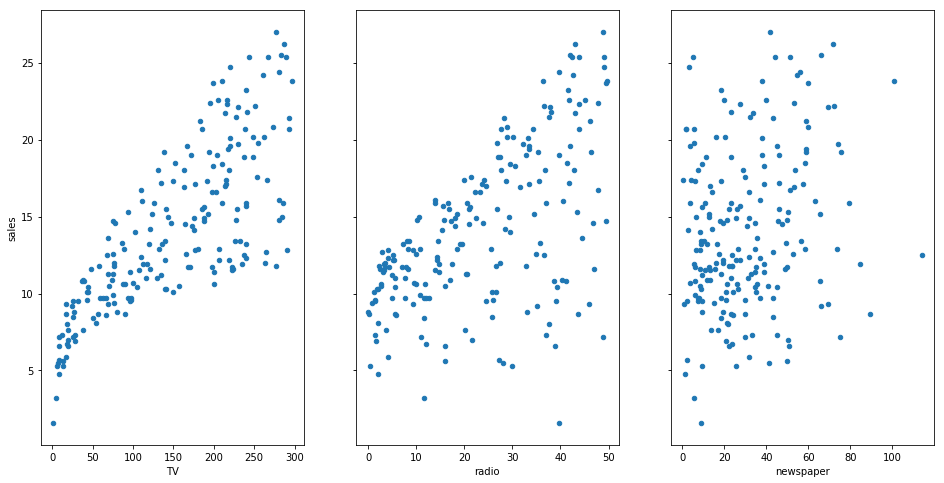

In [34]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

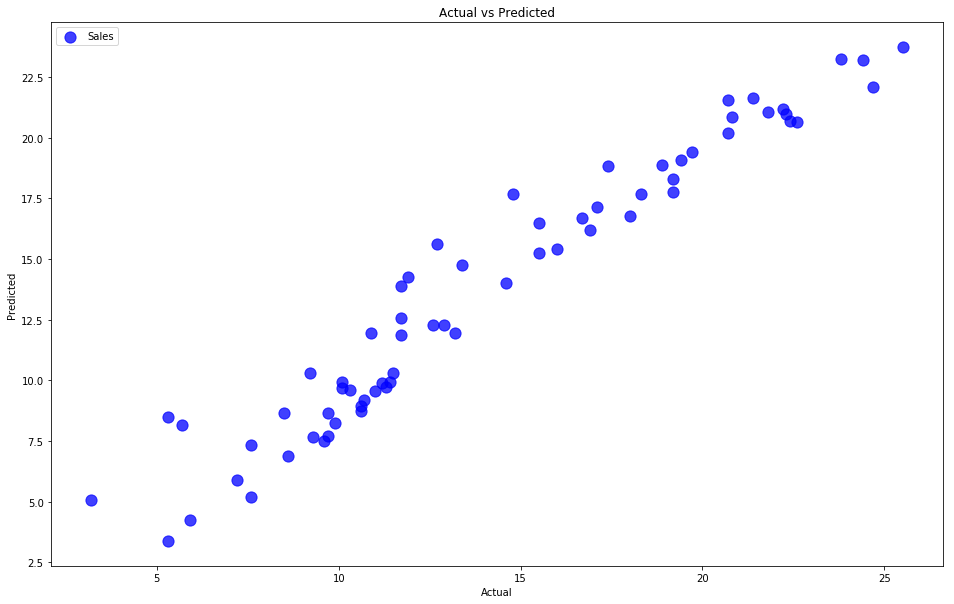

In [46]:
plt.figure(figsize=(16,10))

x = true_lables
y = prediction_linear_model

plt.scatter(x, y, s= 500,c="b", alpha=0.75, marker='.',label='Sales')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Actual vs Predicted')
plt.legend(loc='upper left')
plt.show()